# 1주차 과제 - 13기 이혜민


# 0 - 데이터 준비하기

In [157]:
import numpy as np # numpy 모듈 불러오기
import pandas as pd # pandas 모듈 불러오기

In [158]:
df = pd.read_csv('Auction_master_train.csv') 

# '아파트 경매가격 예측 모델링 대회' 데이터 불러오기

In [159]:
df.describe() #데이터의 요약 통계 확인

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
count,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1929.000000,889.000000,1933.000000,1933.000000,1909.000000,155.000000,1933.000000,1933.000000,1.933000e+03
mean,1380.271081,3.703908e+08,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,601.952307,22.742407,16.980859,8.817900,127.441069,12.748387,36.698018,127.731667,4.726901e+08
std,801.670470,1.337869e+09,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,554.119824,67.000807,9.509021,8.044644,188.394217,10.735663,1.150269,0.993055,5.574493e+08
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,35.051385,126.809393,6.303000e+06
25%,691.000000,7.746112e+07,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,189.000000,1.000000,12.000000,3.000000,24.000000,5.000000,35.188590,126.959167,1.975550e+08
50%,1395.000000,1.728143e+08,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,482.000000,5.000000,15.000000,7.000000,57.000000,9.000000,37.500862,127.065003,3.544500e+08
75%,2062.000000,3.565089e+08,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,834.000000,18.000000,21.000000,12.000000,145.000000,17.500000,37.566116,129.018054,5.599000e+08
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,4255.070000,2.777500e+10,1.422080e+10,4937.000000,1414.000000,80.000000,65.000000,1716.000000,55.000000,37.685575,129.255872,1.515100e+10


In [160]:
df.head() #데이터의 첫 5개의 값 확인

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [161]:
df.info() #데이터 구조 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

#  #피쳐 설명

# (피쳐의 특징을 이해하는 것이 분석에 도움이 될 것 같아서 작성함)

Auction_key - > 경매 아파트 고유 키값 

Auction_class -> 경매 구분 (강제 경매 / 임의 경매)

Bid_class -> 입찰 구분 (일반 / 개별 / 일괄)	

Claim_price	-> 경매 신청인의 청구 금액

Appraisal_company -> 감정사

Appraisal_date -> 감정일자

Auction_count -> 총 경매횟수

Auction_miscarriage_count -> 총 유찰횟수

Total_land_gross_area -> 총 토지 전체면적

Total_land_real_area -> 총 토지 실면적

Total_land_auction_area -> 총 토지 경매면적

Total_building_area -> 총 건물면적

Total_building_aution_area -> 총 건물 경매면적

Total_appraisal_price -> 총 감정가

Minimum_sales_price -> 최저매각가격

First_auction_date -> 최초경매일

Final_auction_date -> 최종경매일

Final_result -> 최종결과

Creditor -> 채권자, 경매 신청인

addr_do -> 주소_시도

addr_si -> 주소_시군구

addr_dong -> 주소_읍면동

addr_li -> 주소_리

addr_san -> 주소_산번지 여부

addr_bunji1 -> 주소_번지1

addr_bunji2 -> 주소_번지2

addr_etc -> 주소_기타주소

Apartment_usage -> 건물의 대표 용도

Completion_date -> 준공일

Preserve_regist_date -> 보존등기일, 건물을 신축하고 처음으로 등기

Total_floor -> 총 층수

Current_floor -> 현재 층수

Specific -> 기타, 특이사항

Share_auction_YorN -> 지분경매 여부 (Y)

road_name -> 도로명 주소_ 도로명	

road_bunji1	-> 도로명 주소_번지1

road_bunji2	-> 도로명 주소_번지2

Close_date	-> 종국일자

Close_result -> 종국 결과 (낙찰 / 배당) 낙찰금을 입금해야 채권자가 배당을 함

point.y	-> 위도

point.x -> 경도

Hammer_price -> 낙찰가


In [162]:
import matplotlib.pyplot as plt   #파이썬 시각화 - visualization 
import seaborn as sns

In [163]:
%matplotlib inline

plt.style.use('seaborn') # seaborn 스타일로 변화
plt.rc('font' , family = 'Malgun Gothic') #맑은 고딕 사용
plt.rc('axes' , unicode_minus = False)

# 1 - 결측값이 있는 모든 열을 없애기

In [165]:
df.isnull().sum(axis=1)

0       4
1       4
2       4
3       3
4       3
       ..
1928    4
1929    4
1930    4
1931    4
1932    4
Length: 1933, dtype: int64

In [166]:
print(df.dropna(axis=1).shape) #결측값이 있는 모든 열 없애기

(1933, 35)


# 2 - 모든 연속형 변수 간의 상관관계를 Heatmap 을 통해 확인해 주세요

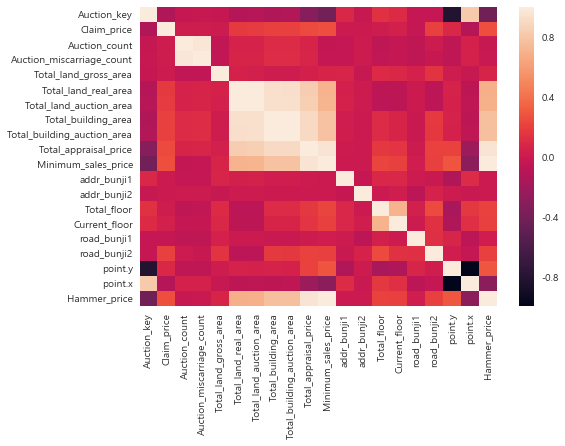

In [168]:
sns.heatmap(df.corr())
plt.show()

# 3 - 모든 연속형 변수의 분포를 Histogram 으로 확인하기

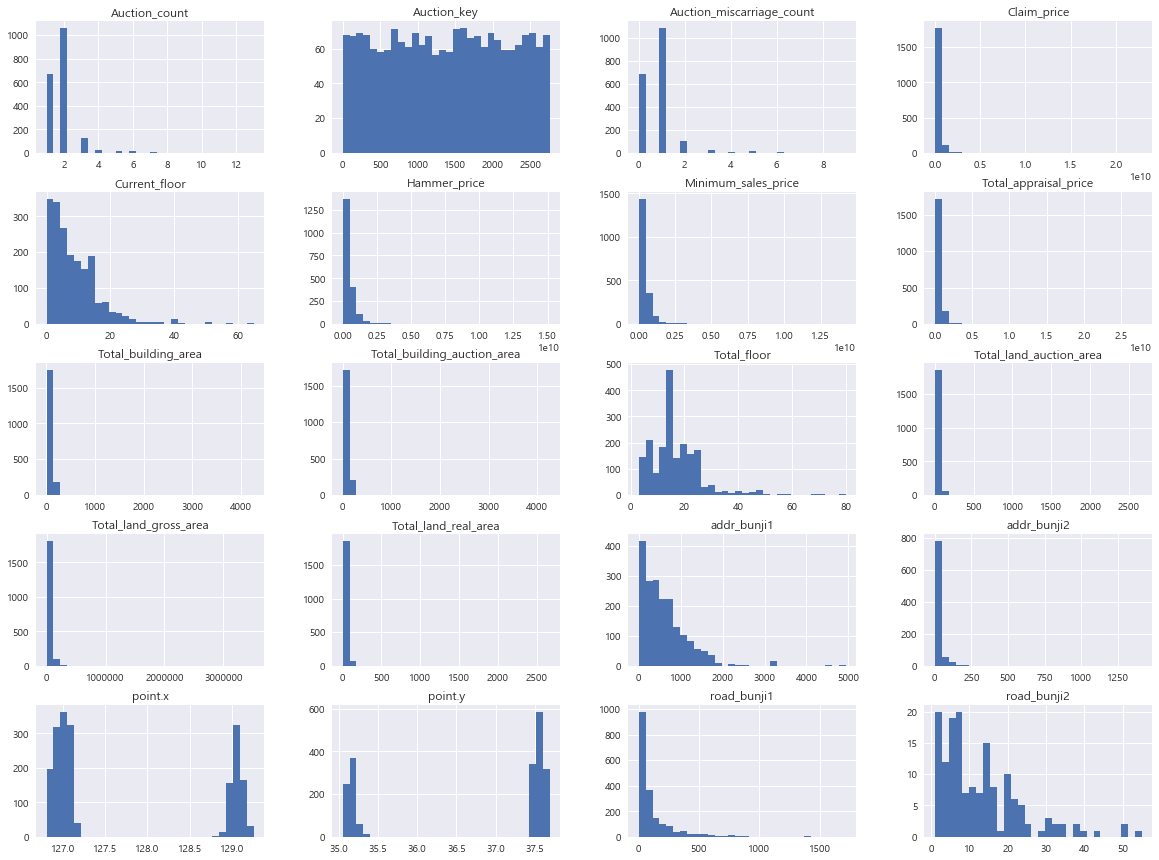

In [169]:
df.hist(bins=30,figsize=(20,15)) #figsize를 통해 plot 크기 조절
plt.show()

# 4 - Target 변수와 관련 있거나, 유의미한 Insight를 얻을 수 있는 시각화

1 - 위도, 경도를 이용하여 상위 50개 데이터 google map 마커 표시 시각화

In [170]:
df2 = df[['point.y','point.x']]   #point.y(위도), point.x(경도)
df2

,point.y,point.x
0,35.162717,129.137048
1,35.156633,129.145068
2,35.184601,128.996765
3,35.154180,129.089081
4,35.099630,128.998874
...,...,...
1928,37.648810,127.048683
1929,37.663291,127.077063
1930,37.558319,126.981994
1931,37.647061,127.028002


In [171]:
df2_top = df2.head(50) #위도, 경도 상위 50개 데이터
df2_top

,point.y,point.x
0,35.162717,129.137048
1,35.156633,129.145068
2,35.184601,128.996765
3,35.154180,129.089081
4,35.099630,128.998874
5,35.086933,129.065706
6,35.084049,129.070231
7,35.127808,129.112206
8,35.080817,129.020155
9,35.187903,129.130913


In [172]:
import folium #지도 시각화 모듈 불러오기
map = folium.Map(location=[35.166804,129.083479],zoom_start=12) #지도 초기 로딩위치
map

In [173]:
for item in df2_top.index: #위도, 경도 불러오는 for문
    lat = df2_top.loc[item,'point.y'] #위도
    long = df2_top.loc[item,'point.x'] #경도
    folium.CircleMarker([lat,long],      #원 모양 마커 사용
                      radius=3,         #마커의 반지름
                      color='red',      #마커의 색깔 
                      fill = True).add_to(map)

map

#지도로 위도, 경도를 활용한 위치를 시각화하여 상위 50개 데이터가 부산의 경매자 분포임을 확인해보았다.

2 - 입찰 구분 시각화

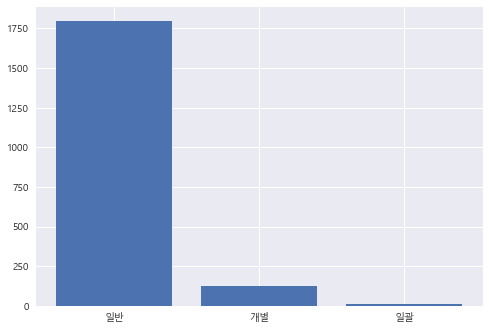

In [174]:
Bid = df['Bid_class'].value_counts()
plt.bar(Bid.index,Bid)
plt.show()

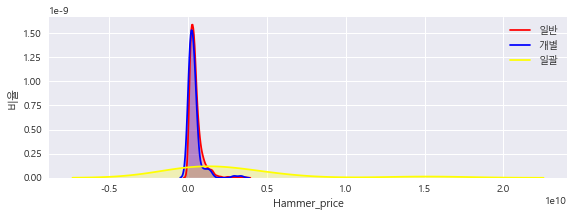

In [175]:
# Bid_class에 따른 Hammer_price값 subplot으로 확인하기

g = plt.subplot(2,1,1)
g = sns.kdeplot(df.query('Bid_class == "일반"')['Hammer_price'], color = "red",shade= True)
g = sns.kdeplot(df.query('Bid_class == "개별"')['Hammer_price'], color = 'blue', shade = True)
g = sns.kdeplot(df.query('Bid_class == "일괄"')['Hammer_price'], color = 'yellow', shade = True)
g.set_xlabel('Hammer_price')
g.set_ylabel('비율')
g = g.legend(['일반','개별','일괄'])

plt.tight_layout()
plt.show()



3 - 경매 구분 시각화

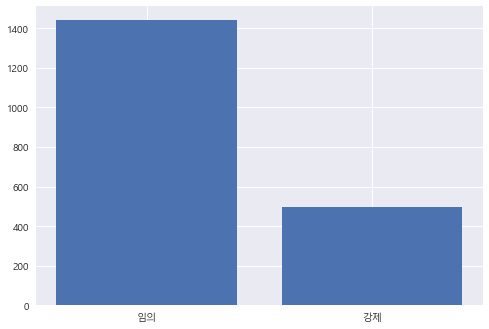

In [176]:
Bid = df['Auction_class'].value_counts()  #Auciton_class의 범주 값들을 count하여 변수 Bid에 넣기
plt.bar(Bid.index,Bid)  #bar로 시각화
plt.show()

In [177]:
Bid #Bid 개수 확인

임의    1439
강제     494
Name: Auction_class, dtype: int64

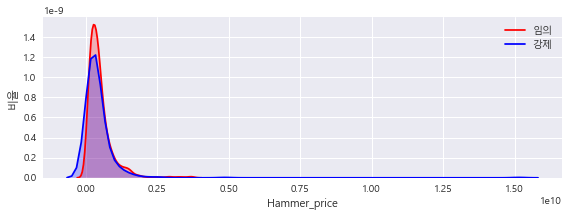

In [178]:
#Auction_class에 따른 Hammer_price값 subplot으로 확인하기

g = plt.subplot(2,1,1)
g = sns.kdeplot(df.query('Auction_class == "임의"')['Hammer_price'], color = "red",shade= True)
g = sns.kdeplot(df.query('Auction_class == "강제"')['Hammer_price'], color = 'blue', shade = True)
g.set_xlabel('Hammer_price')
g.set_ylabel('비율')
g = g.legend(['임의','강제'])

plt.tight_layout()
plt.show()

#위의 그래프를 해석해보면, 낙찰가는 0.00~0.25 사이에 분포가 몰려있음을 알 수 있다.
#또한, 강제보다는 임의의 경매 Hammer_price가 높은 데이터가 몇 개 존재한다.

4 - 배당, 낙찰 구분 시각화

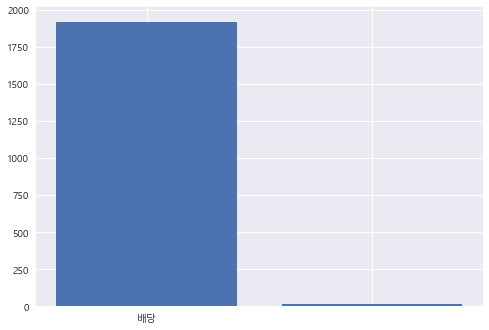

In [179]:
Bid = df['Close_result'].value_counts() #Close_result의 범주 값들을 count하여 변수 Bid에 넣기
plt.bar(Bid.index,Bid) #bar로 시각화
plt.show()

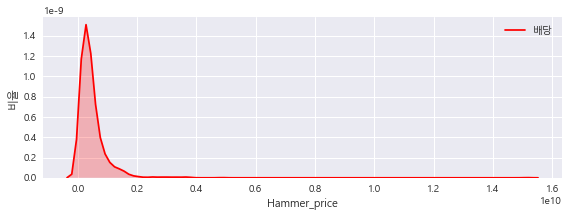

In [180]:
#Close_result에 따른 Hammer_price값 subplot으로 확인하기
#종국결과, 낙찰과 배당
#경매 진행은 경매진행(낙찰) ▷ 낙찰허가결정 ▷ 대금납부 ▷ 배당 후 종결 로 이뤄진다.

g = plt.subplot(2,1,1)
g = sns.kdeplot(df.query('Close_result == "배당"')['Hammer_price'], color = "red",shade= True)
g.set_xlabel('Hammer_price')
g.set_ylabel('비율')
g = g.legend(['배당'])

plt.tight_layout()
plt.show()

5 - Apartment_usage 시각화

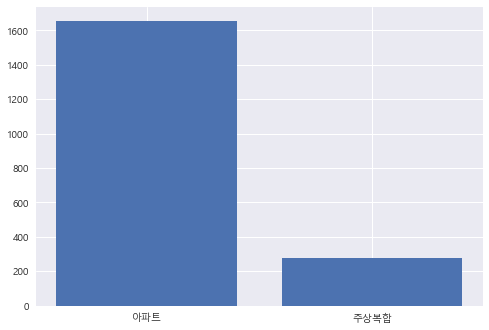

In [181]:
Bid = df['Apartment_usage'].value_counts() #Apartment_usage의 범주 값들을 count하여 변수 Bid에 넣기
plt.bar(Bid.index,Bid) #bar로 시각화
plt.show()

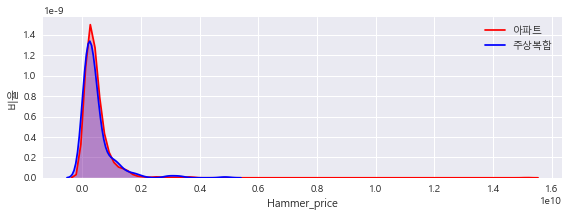

In [182]:
#Close_result에 따른 Hammer_price값 subplot으로 확인하기
#종국결과, 낙찰과 배당
#경매 진행은 경매진행(낙찰) ▷ 낙찰허가결정 ▷ 대금납부 ▷ 배당 후 종결 로 이뤄진다.

g = plt.subplot(2,1,1)
g = sns.kdeplot(df.query('Apartment_usage == "아파트"')['Hammer_price'], color = "red",shade= True)
g = sns.kdeplot(df.query('Apartment_usage == "주상복합"')['Hammer_price'], color = "blue",shade= True)
g.set_xlabel('Hammer_price')
g.set_ylabel('비율')
g = g.legend(['아파트','주상복합'])

plt.tight_layout()
plt.show()

#아파트의 분포가 넓은 것을 보아 Hammer_price가 높은게 몇 채 존재할 수 있다.

# 5 - 유의미한 Feature를 10개 이상 생성하기

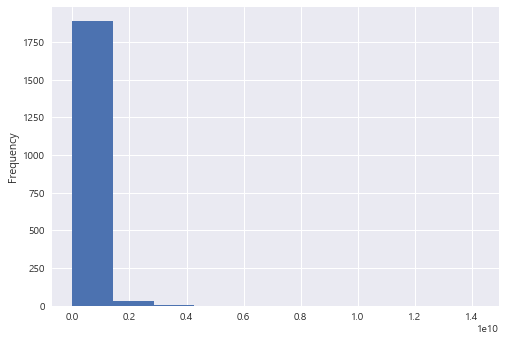

In [183]:
#1 - log_MSP
df['Minimum_sales_price'].plot.hist() 

In [184]:
df.Minimum_sales_price

0        668800000
1        858400000
2         76160000
3        230720000
4        136000000
           ...    
1928     401000000
1929     363200000
1930    1028000000
1931     325600000
1932     600000000
Name: Minimum_sales_price, Length: 1933, dtype: int64

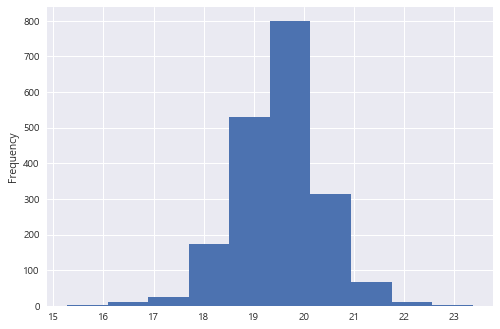

In [185]:
np.log(df['Minimum_sales_price']).plot.hist()
plt.show()

In [186]:
df['log_MSP']=np.log(df['Minimum_sales_price']) #Minimum_sales_price에 log를 씌워 새로운 데이터 log_MSP 생성

df['log_MSP']

0       20.320996
1       20.570581
2       18.148347
3       19.256715
4       18.728165
          ...    
1928    19.809472
1929    19.710464
1930    20.750881
1931    19.601180
1932    20.212440
Name: log_MSP, Length: 1933, dtype: float64

In [187]:
#2 - sqrt_MSP

np.sqrt(df['Minimum_sales_price']) #Minimum_sales_price에 루트를 씌워 제곱근을 구한다.

0       25861.167800
1       29298.464124
2        8726.969692
3       15189.470037
4       11661.903790
            ...     
1928    20024.984395
1929    19057.806799
1930    32062.439084
1931    18044.389710
1932    24494.897428
Name: Minimum_sales_price, Length: 1933, dtype: float64

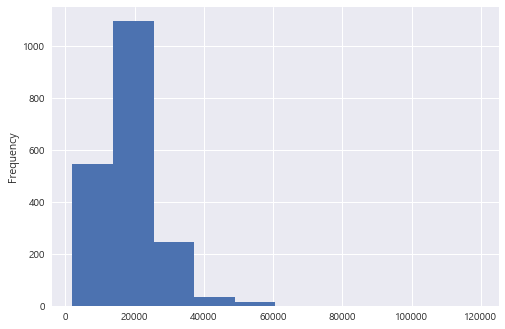

In [188]:
df['sqrt_MSP']=np.sqrt(df['Minimum_sales_price']).plot.hist()  #새로운 sqrt_MSP 피쳐 생성

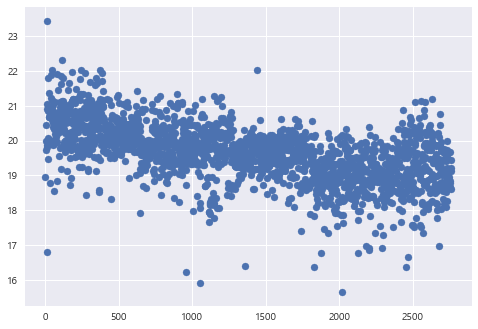

In [189]:
#3 - Auction_key2

df['Hammer_price']=np.log(df['Hammer_price'])
plt.scatter(x=df['Auction_key'],y=(df['Hammer_price'])) #x축은 Auction_key, y축은 Hammer_price
plt.show()

#위의 상관관계를 보면서, -0.5의 상관관계 수치가 나옴을 보아 무언가 연관성이 있다고 생각했다.
#따라서, scatter를 통해 분포를 보았고 확실히 3000대에 가까울 수록 Hammer_price가 낮아진다고 볼 수 있었다.

In [190]:
# 구간별로 나누는 코드
def major_hour(x):
    if 0 <= x <= 1000:
        return '1000이하'
    elif 1001 <= x < 2000:
        return '1000대'
    else:
        return '2000대'
    
df['Auction_key2'] = df['Auction_key'].apply(major_hour) 
#major_hour코드는 Auction_key 피쳐로 적용하여, 새로운 Auction_key2 피쳐 생성

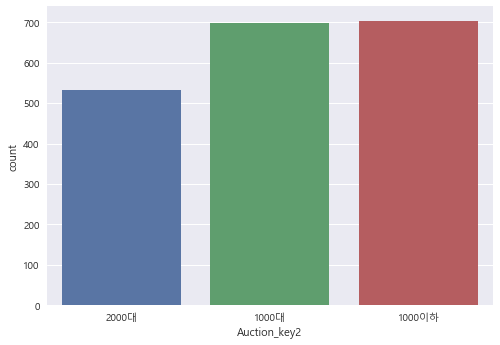

0        2000대
1        2000대
2        2000대
3        2000대
4        1000대
         ...  
1928     1000대
1929     1000대
1930    1000이하
1931     1000대
1932    1000이하
Name: Auction_key2, Length: 1933, dtype: object

In [191]:
sns.countplot("Auction_key2", data=df)
plt.show()
df.Auction_key2

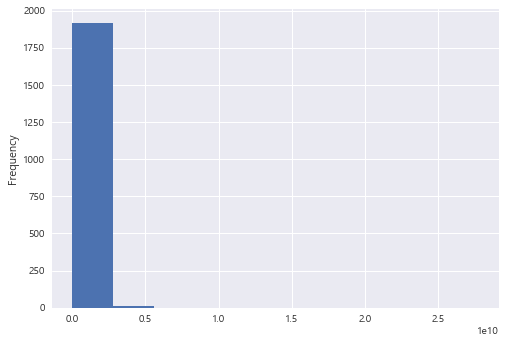

In [192]:
#4 - log_Tap
df['Total_appraisal_price'].plot.hist() 
plt.show()

#한눈에 알아보기 어려움

In [193]:
df.Total_appraisal_price

0        836000000
1       1073000000
2        119000000
3        288400000
4        170000000
           ...    
1928     401000000
1929     454000000
1930    1285000000
1931     407000000
1932     750000000
Name: Total_appraisal_price, Length: 1933, dtype: int64

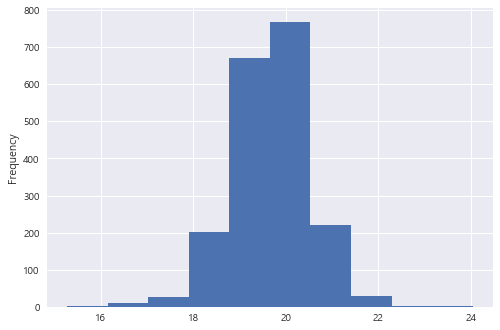

In [194]:
np.log(df['Total_appraisal_price']).plot.hist() #log를 씌워서 분포 시각화를 다양하게 해준다.
plt.show()

In [195]:
df['log_Tap']=np.log(df['Total_appraisal_price']) #새로운 log_Tap 피쳐 생성

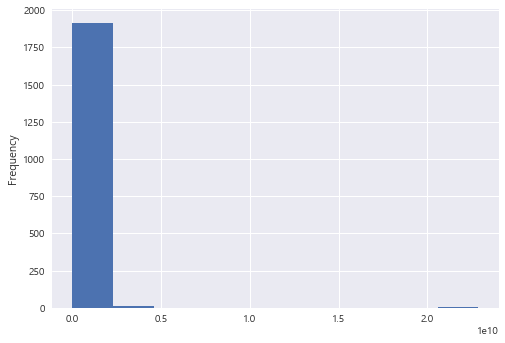

In [196]:
#5 - log_CP
df['Claim_price'].plot.hist()  #Claim_price 그래프를 보았을 때, 시각적으로 파악이 어려움
plt.show()

C:\ProgramData\Anaconda3\envs\choi\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


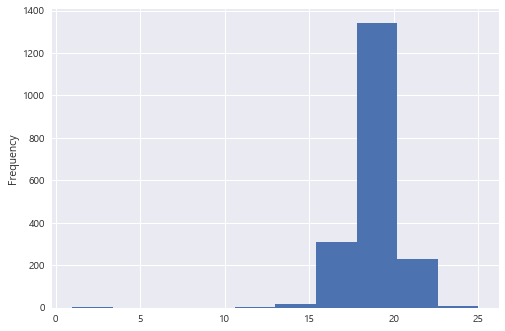

In [197]:
df['log_Cp'] = np.log(df['Claim_price']) # Claim_price log화 시키기
df['log_Cp'].plot.hist(range=(1,25)) #1부터 25까지 범위의 Claim_price를 log한 값들의 분포를 확인
plt.show()

In [198]:
df['log_Cp'] #새로운 log_Cp 피쳐 생성

0       21.292004
1       18.845601
2       16.242657
3       19.028170
4       17.641707
          ...    
1928    19.450300
1929    19.113828
1930    19.687080
1931    18.197537
1932    19.008467
Name: log_Cp, Length: 1933, dtype: float64

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 46 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

In [200]:
min(df['log_Cp'])   #hist 그래프로 나타낼 수 없음 (최소값이 무한대라)

-inf

In [201]:
#6 - sqrt_Cp
np.sqrt(df['Claim_price']) #루트를 씌워 제곱근만들기

0       42024.246585
1       12367.168916
2        3365.488078
3       13549.233336
4        6774.043918
            ...     
1928    16733.200531
1929    14142.135624
1930    18836.280392
1931     8944.271910
1932    13416.407865
Name: Claim_price, Length: 1933, dtype: float64

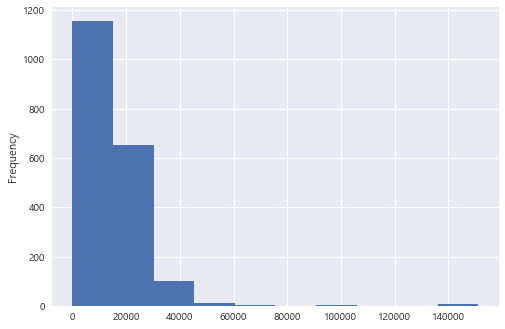

In [202]:
df['sqrt_Cp']=np.sqrt(df['Claim_price']).plot.hist() #새로운 sqrt_Cp 제곱근 피쳐 생성

In [203]:
#7 - new_price
#상관관계가 제일 높았던 Total_appraisal_price와 Minimum_sales_price을 합치고 평균을 구한다.

df['new_price']=np.nan #NaN을 구성된 new_price 열 추가

df['new_price']=(df['Total_appraisal_price']+df['Minimum_sales_price'])/2   #새로운 값 구해서 new_price 피쳐 생성

In [204]:
df.new_price

0       7.524000e+08
1       9.657000e+08
2       9.758000e+07
3       2.595600e+08
4       1.530000e+08
            ...     
1928    4.010000e+08
1929    4.086000e+08
1930    1.156500e+09
1931    3.663000e+08
1932    6.750000e+08
Name: new_price, Length: 1933, dtype: float64

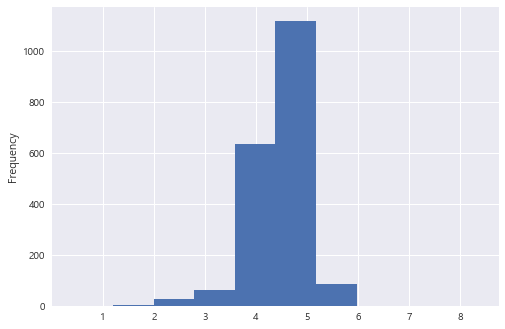

In [230]:
#8 - log_Tbar

df['log_Tbar']=np.log(df['Total_building_auction_area']) #Total_building_auction_area의 값에 로그를 씌우기 log_Tbar로 피쳐 생성
df['log_Tbar'].plot.hist()
plt.show()

#log_Tbar 새로운 피쳐 생성

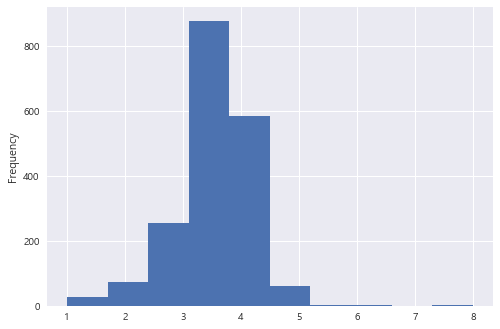

In [231]:
#9 - log_Tlar

df['log_Tlar']=np.log(df['Total_land_auction_area']) #Total_land_auction_area의 값에 로그를 씌우기 log_Tlar로 피쳐 생성
df['log_Tlar'].plot.hist(range=(1,8))
plt.show()

#log_Tlar 새로운 피쳐 생성

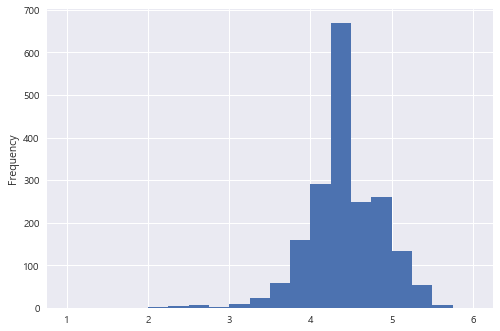

In [232]:
#10 - log_Tba

df['log_Tba']=np.log(df['Total_building_area']) #Total_building_area의 값에 로그를 씌우기 log_Tba로 피쳐 생성
df['log_Tba'].plot.hist(range=(1,6), bins=20)
plt.show()

#log_Tba 새로운 피쳐 생성

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 51 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

2020-01-20 PM7:58 / 데이터 EDA 및 전처리 분석 과제 완료!